In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/deaths-illicit-drugs NEW.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 5 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   COUNTRY                                                                              6960 non-null   object
 1   Code                                                                                 6960 non-null   object
 2   Year                                                                                 6960 non-null   int64 
 3   Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)                     6960 non-null   int64 
 4   Deaths that are from all causes attributed to drug use, in both sexes aged all ages  6960 non-null   object
dtypes: int64(2), object(3)
memory usage: 272.0+ KB


In [ ]:
data.head()

,COUNTRY,Code,Year,Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),"Deaths that are from all causes attributed to drug use, in both sexes aged all ages"
0,American Samoa,ASM,1990,0,13.090.138
1,Andorra,AND,1990,0,20.659.685
2,Antigua and Barbuda,ATG,1990,0,6.584.844
3,Bahamas,BHS,1990,0,39.783.647
4,Barbados,BRB,1990,0,26.759.732


In [ ]:
data.isnull().sum()

COUNTRY                                                                                0
Code                                                                                   0
Year                                                                                   0
Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)                       0
Deaths that are from all causes attributed to drug use, in both sexes aged all ages    0
dtype: int64

In [ ]:
data.shape

(6960, 5)

In [ ]:
x=data.iloc[:,[2,3]].values
x

array([[1990,    0],
       [1990,    0],
       [1990,    0],
       ...,
       [2019,    0],
       [2019,    0],
       [2019,    0]])

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=70)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'ELBOW GRAPH')

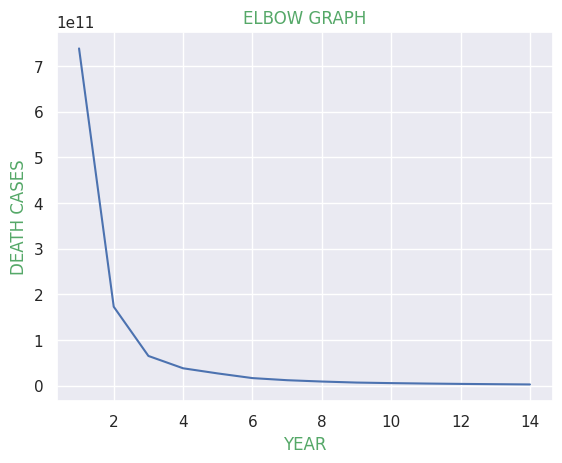

In [ ]:
sns.set()
plt.plot(range(1,15),wcss)
plt.xlabel('YEAR',c='g')
plt.ylabel('DEATH CASES',c='g')
plt.title('ELBOW GRAPH',c='g')

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

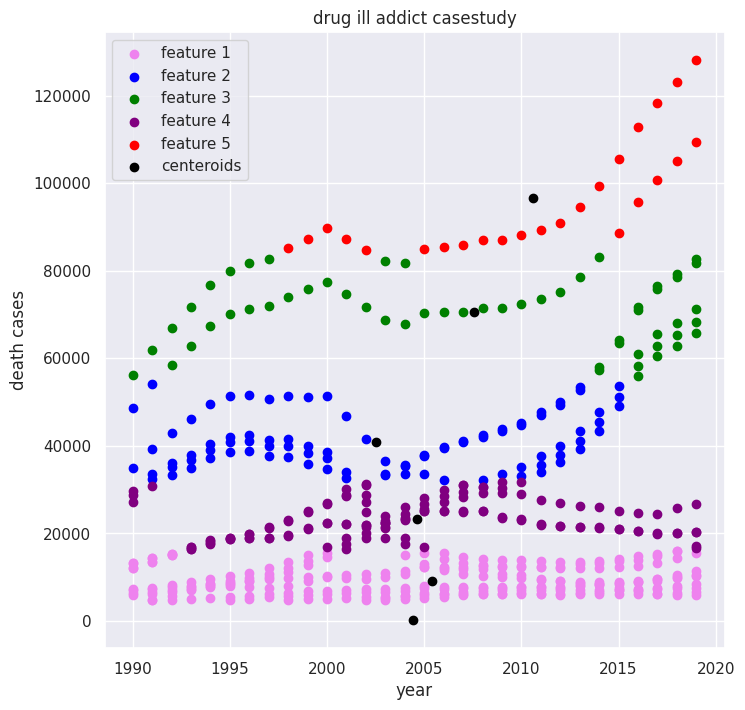

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],c='violet',label='feature 1')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label='feature 2')
plt.scatter(x[y==2,0],x[y==2,1],c='green',label='feature 3')
plt.scatter(x[y==3,0],x[y==3,1],c='purple',label='feature 4')
plt.scatter(x[y==4,0],x[y==4,1],c='red',label='feature 5')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='centeroids')
plt.xlabel('year')
plt.ylabel('death cases')
plt.title('drug ill addict casestudy')
plt.legend()
plt.show()